In [2]:
from utils.data_loader import fetch_yf_stock_data, add_technical_indicator

In [3]:
TICKERS = ['GC=F', 'QQQ', 'SQQQ', 'SPY', '^VIX', 'DX-Y.NYB', '^TNX', 'DFDV']

In [4]:
df_gold = fetch_yf_stock_data('GC=F', interval='15m', period='60d', auto_adjust=False)

[*********************100%***********************]  1 of 1 completed


,Datetime,Adj Close,Close,High,Low,Open,Volume
298,2025-05-06 14:30:00,69.150002,69.150002,69.499496,68.775002,69.499496,1096
299,2025-05-06 14:15:00,68.000000,68.000000,69.320000,67.989998,69.320000,1527
300,2025-05-06 14:00:00,67.989998,67.989998,70.480003,66.401001,70.480003,3936
301,2025-05-06 13:45:00,70.364998,70.364998,71.199997,69.720001,71.000000,7046
302,2025-05-06 13:30:00,71.239998,71.239998,71.239998,65.000000,65.000000,13491


In [5]:
df_DFDV_new.to_csv('./data/yf_df_DFDV15m_price.csv', index=False)

In [12]:
import pandas as pd
df_gold_old = pd.read_csv('./data/yf_gcf15m_price.csv', index_col=0)
df_gold_old.index = pd.to_datetime(df_gold_old.index).strftime("%Y-%m-%d %H:%M:%S")
df_gold_old = df_gold_old[::-1]
df_gold_old.reset_index(inplace=True)
df_gold_old.head()

,Datetime,Adj Close,Close,High,Low,Open,Volume
0,2025-05-08 07:15:00,3340.199951,3340.199951,3345.800049,3339.100098,3344.399902,1139
1,2025-05-08 07:00:00,3344.399902,3344.399902,3345.500000,3332.699951,3335.500000,5274
2,2025-05-08 06:45:00,3335.399902,3335.399902,3337.399902,3325.399902,3336.100098,4373
3,2025-05-08 06:30:00,3336.000000,3336.000000,3347.399902,3331.199951,3345.300049,6910
4,2025-05-08 06:15:00,3344.899902,3344.899902,3352.199951,3340.699951,3350.399902,6913


In [16]:
last_day = df_gold_old['Datetime'].iloc[0]
last_day

'2025-05-08 07:15:00'

In [17]:
last_day_idx = df_gold_new['Datetime'].to_list().index(last_day)
last_day_idx

896

In [19]:
df_gold_new = df_gold_new.iloc[:last_day_idx]
df_gold_new.tail()

,Datetime,Adj Close,Close,High,Low,Open,Volume
891,2025-05-08 08:30:00,3346.899902,3346.899902,3348.300049,3343.300049,3346.100098,1570
892,2025-05-08 08:15:00,3346.300049,3346.300049,3349.300049,3342.199951,3344.500000,2189
893,2025-05-08 08:00:00,3344.699951,3344.699951,3350.500000,3343.899902,3349.100098,1375
894,2025-05-08 07:45:00,3348.899902,3348.899902,3354.899902,3346.000000,3352.399902,2713
895,2025-05-08 07:30:00,3352.800049,3352.800049,3354.399902,3344.000000,3344.300049,4957


In [20]:
df_gold_merge = pd.concat([df_gold_new, df_gold_old], ignore_index=False)
df_gold_merge.head()

,Datetime,Adj Close,Close,High,Low,Open,Volume
0,2025-05-22 01:00:00,3327.899902,3327.899902,3331.300049,3321.199951,3325.100098,1996
1,2025-05-22 00:45:00,3325.199951,3325.199951,3327.000000,3322.000000,3324.399902,1066
2,2025-05-22 00:30:00,3324.500000,3324.500000,3324.899902,3321.199951,3322.199951,844
3,2025-05-22 00:15:00,3322.000000,3322.000000,3325.800049,3320.899902,3325.699951,1088
4,2025-05-22 00:00:00,3325.500000,3325.500000,3328.100098,3321.699951,3321.699951,1465


In [21]:
df_gold_merge.tail()

,Datetime,Adj Close,Close,High,Low,Open,Volume
4517,2025-02-27 06:00:00,2907.399902,2907.399902,2908.800049,2903.199951,2903.800049,1992
4518,2025-02-27 05:45:00,2903.600098,2903.600098,2908.800049,2902.600098,2906.800049,1915
4519,2025-02-27 05:30:00,2907.000000,2907.000000,2908.300049,2902.100098,2908.300049,2327
4520,2025-02-27 05:15:00,2908.300049,2908.300049,2910.500000,2905.500000,2909.699951,1848
4521,2025-02-27 05:00:00,2909.600098,2909.600098,2913.100098,2907.800049,2911.899902,578


In [23]:
df_gold_merge.to_csv('./data/yf_gcf15m_price.csv', index = False)

In [24]:
df_gold_merge_ta = add_technical_indicator(df_gold_merge)
df_gold_merge_ta.tail()

,Datetime,Adj Close,Close,High,Low,Open,Volume,bb_bbm,bb_bbh,bb_bbl,...,MACD_signal,MACD_diff,MACDD_sign,MACDD_sign_shift,MACDD_sign_signal,WilliamsR,WilliamsR_signal,sma50,sma200,sma_signal
4517,2025-02-27 06:00:00,2907.399902,2907.399902,2908.800049,2903.199951,2903.800049,1992,2902.359998,2911.594141,2893.125854,...,1.875691,0.690552,1,1.0,0,-14.692338,-1,2897.977998,2880.209498,1
4518,2025-02-27 05:45:00,2903.600098,2903.600098,2908.800049,2902.600098,2906.800049,1915,2902.240002,2911.343269,2893.136736,...,1.962019,0.345315,1,1.0,0,-32.700808,0,2898.140000,2880.339498,1
4519,2025-02-27 05:30:00,2907.000000,2907.000000,2908.300049,2902.100098,2908.300049,2327,2902.325000,2911.571583,2893.078417,...,2.039497,0.309911,1,1.0,0,-18.716626,-1,2898.320000,2880.502998,1
4520,2025-02-27 05:15:00,2908.300049,2908.300049,2910.500000,2905.500000,2909.699951,1848,2902.525000,2912.100979,2892.949021,...,2.123459,0.335847,1,1.0,0,-12.221951,-1,2898.582002,2880.645999,1
4521,2025-02-27 05:00:00,2909.600098,2909.600098,2913.100098,2907.800049,2911.899902,578,2902.970007,2912.982624,2892.957391,...,2.222985,0.398105,1,1.0,0,-16.990211,-1,2898.960005,2880.800999,1


<Axes: >

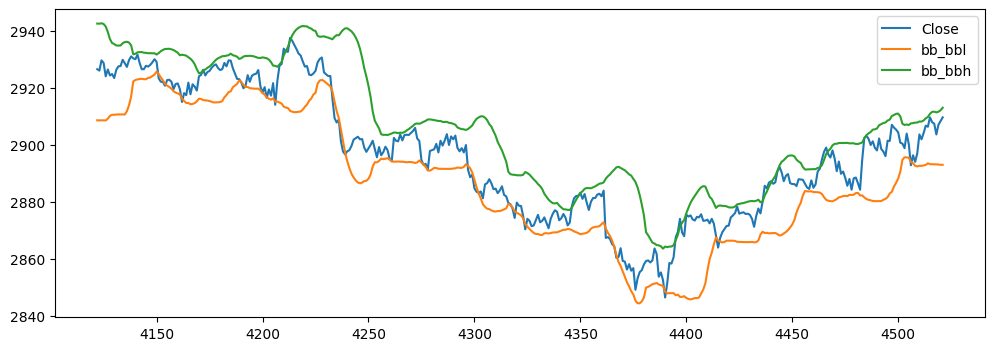

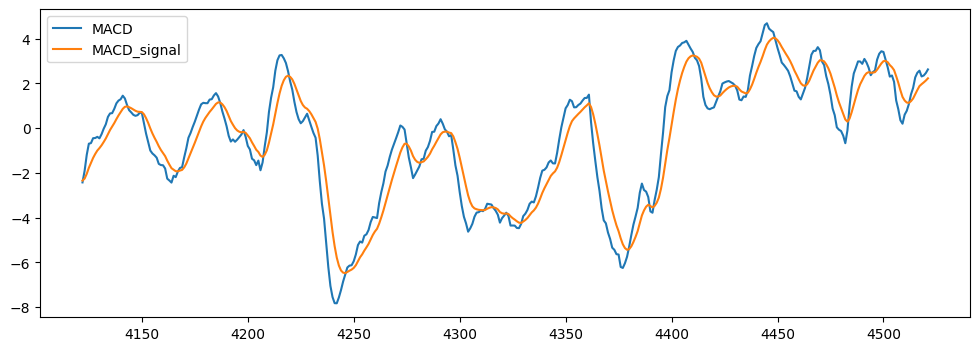

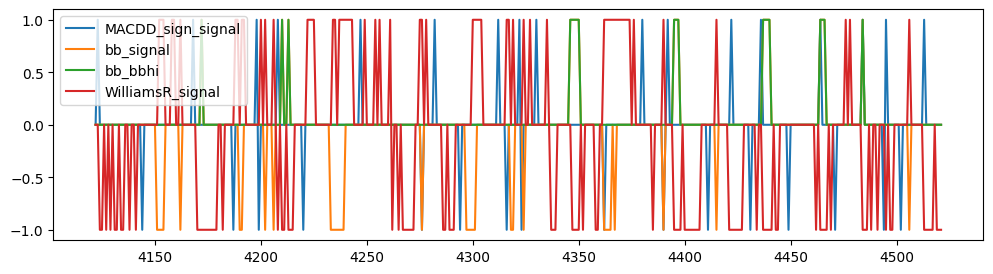

In [26]:
df_gold_merge_ta.iloc[-400:][['Close','bb_bbl','bb_bbh']].plot(figsize=(12,4), legend=True)
df_gold_merge_ta.iloc[-400:][['MACD','MACD_signal']].plot(figsize=(12,4), legend=True)
df_gold_merge_ta.iloc[-400:][['MACDD_sign_signal','bb_signal','bb_bbhi', 'WilliamsR_signal']].plot(figsize=(12,3), legend=True)

In [14]:
now = datetime.now()
end_datetime = now - timedelta(days= 5)
end_datetime

datetime.datetime(2025, 5, 15, 17, 47, 27, 873093)

In [19]:
cur_datetime = now - timedelta(days= 6)
delta_datetime = (cur_datetime - end_datetime).total_seconds()
delta_datetime

-86400.0

In [9]:
df_gold_news_old.head()

,DateTime,headline,source,link
0,5/15/2025 9:00,New CFD Broker Versus Trade Launches with Uniq...,FinanceWire,https://www.investing.com/news/company-news/ne...
1,5/15/2025 8:35,Indonesia stocks higher at close of trade; IDX...,Investing.com,https://www.investing.com/news/stock-market-ne...
2,5/15/2025 6:30,Australia stocks higher at close of trade; S&P...,Investing.com,https://www.investing.com/news/stock-market-ne...
3,5/15/2025 6:05,Taiwan stocks higher at close of trade; Taiwan...,Investing.com,https://www.investing.com/news/stock-market-ne...
4,5/15/2025 5:35,Gold prices hit 1-mth low with US-China trade ...,Investing.com,https://www.investing.com/news/commodities-new...


In [10]:
df_gold_news_old['DateTime'].iloc[0]

'5/15/2025 9:00'

In [1]:
from utils.data_loader import fetch_investing_news_data, update_news_data
from utils.data_loader import get_investing_news_content
from datetime import datetime, timedelta
import pandas as pd
import os
import sys

In [2]:
df_gold_news_old = pd.read_csv('./data/investing_gold_new2.csv', encoding='unicode_escape')

In [3]:
end_datetime = pd.to_datetime(df_gold_news_old['DateTime'].iloc[0])
end_datetime

Timestamp('2025-05-15 09:00:00')

In [4]:
df_gold_news_new = fetch_investing_news_data('GC=F', end_datetime = end_datetime)

News collected from 2025-05-20 08:51:07 to 2025-05-15 09:00:47


In [6]:
df_merge = pd.concat([df_gold_news_new, df_gold_news_old], ignore_index=True)
df_merge.head()

,DateTime,headline,source,link
0,2025-05-20 08:51:07,"World stocks inch higher, Japanese super-long ...",Reuters,https://www.investing.com/news/economy-news/as...
1,2025-05-20 07:22:09,Dealing with the US downgrade,Reuters,https://www.investing.com/news/economy-news/tr...
2,2025-05-20 06:35:03,Australia stocks higher at close of trade; S&P...,Investing.com,https://www.investing.com/news/stock-market-ne...
3,2025-05-20 06:07:19,"Gold prices dip as Australia, China, rate cuts...",Investing.com,https://www.investing.com/news/commodities-new...
4,2025-05-19 22:15:28,Perpetua Resources receives final federal perm...,Reuters,https://www.investing.com/news/stock-market-ne...


In [11]:
df_gold_news_old

,headline,source,link
DateTime,,,
2025-05-20 08:51:07,"World stocks inch higher, Japanese super-long ...",Reuters,https://www.investing.com/news/economy-news/as...
2025-05-20 07:22:09,Dealing with the US downgrade,Reuters,https://www.investing.com/news/economy-news/tr...
2025-05-20 06:35:03,Australia stocks higher at close of trade; S&P...,Investing.com,https://www.investing.com/news/stock-market-ne...
2025-05-20 06:07:19,"Gold prices dip as Australia, China, rate cuts...",Investing.com,https://www.investing.com/news/commodities-new...
2025-05-19 22:15:28,Perpetua Resources receives final federal perm...,Reuters,https://www.investing.com/news/stock-market-ne...
...,...,...,...
2/28/2025 9:27,"Hartnett: Below this S&P 500 level, ¶©?Stocks ...",Investing.com,https://www.investing.com/news/stock-market-ne...
2/28/2025 8:35,Indonesia stocks lower at close of trade; IDX ...,Investing.com,https://www.investing.com/news/stock-market-ne...
2/28/2025 7:06,Gold prices drop ahead of PCE inflation; on tr...,Investing.com,https://www.investing.com/news/commodities-new...


In [16]:
df_gold_news_old = pd.read_csv('./data/investing_gold_new.csv')
df_gold_news_old['DateTime'] = pd.to_datetime(df_gold_news_old['DateTime'])
df_gold_news = update_news_data(df_gold_news_old, 'GC=F')
if len(df_gold_news) != len(df_gold_news_old):
    df_gold_news.to_csv('./data/investing_gold_new.csv', index=False)

ValueError: time data "5/15/2025 9:00" doesn't match format "%Y-%m-%d %H:%M:%S", at position 88. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [14]:
df_gold_news.head()

,DateTime,headline,source,link
0,2025-05-20 08:51:07,"World stocks inch higher, Japanese super-long ...",Reuters,https://www.investing.com/news/economy-news/as...
1,2025-05-20 08:51:07,"World stocks inch higher, Japanese super-long ...",Reuters,https://www.investing.com/news/economy-news/as...
2,2025-05-20 07:22:09,Dealing with the US downgrade,Reuters,https://www.investing.com/news/economy-news/tr...
3,2025-05-20 06:35:03,Australia stocks higher at close of trade; S&P...,Investing.com,https://www.investing.com/news/stock-market-ne...
4,2025-05-20 06:07:19,"Gold prices dip as Australia, China, rate cuts...",Investing.com,https://www.investing.com/news/commodities-new...


In [15]:
df_gold_news['DateTime'] = pd.to_datetime(df_gold_news['DateTime'])

In [2]:
from selenium import webdriver
from selenium.webdriver.common.by import By
import time
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd

In [3]:
ticker = 'GC=F'

In [4]:
df_yfnews_old = pd.read_csv('./data/yf_gold_news.csv')
df_yfnews_old.head()

,headline,source,date,time,description,link
0,Gold Rises Amid Trade-War Risks While Traders ...,Bloomberg • 6 days ago,2025-May-5,10:29 PM,(Bloomberg) -- Gold advanced amid ongoing trad...,https://finance.yahoo.com/quote/GC=F/news/
1,What investors need to know during times of tu...,Yahoo Finance • 6 days ago,2025-May-5,9:59 PM,Worried about your investments? Here's what Ri...,https://finance.yahoo.com/quote/GC=F/news/
2,Market Prepares for the FED: Traders Expect No...,FX Empire • 7 days ago,2025-May-5,3:38 PM,Gold had probably finished its active phase of...,https://finance.yahoo.com/quote/GC=F/news/
3,Gold stems sell-off on signs of easing US-Chin...,Yahoo Finance UK • 9 days ago,2025-May-2,8:04 PM,China has said it's evaluating approaches from...,https://finance.yahoo.com/quote/GC=F/news/
4,Stock market today: Nasdaq surges as AI trade ...,Yahoo Finance • 10 days ago,2025-May-2,7:06 AM,Microsoft and Meta's strong earnings reports e...,https://finance.yahoo.com/quote/GC=F/news/


In [6]:
last_news = df_yfnews_old.iloc[0]['headline']
last_news

'Gold Rises Amid Trade-War Risks While Traders Await Fed Decision'

In [8]:
from utils.data_loader import update_news_data

In [9]:
df_yf_news = update_news_data(df_yfnews_old, 'GC=F', 'yfinance')

In [10]:
df_yf_news.head(10)

,headline,source,description,date,time,link
0,Gold prices rise as investors 'value-buying' a...,Yahoo Finance UK,Gold prices recovered some ground on Tuesday m...,2025-May-13,6:26 PM,https://finance.yahoo.com/news/gold-us-china-t...
1,"Oil prices soar, gold slips on US-China trade ...",Yahoo Finance Video,"Crude oil prices (CL=F, BZ=F) are seeing a boo...",2025-May-13,2:20 AM,https://finance.yahoo.com/video/oil-prices-soa...
2,"Oil prices rise, gold slips, Kindly MD-Nakamot...",Yahoo Finance Video,Yahoo Finance host&nbsp;Josh Lipton tracks tod...,2025-May-13,1:23 AM,https://finance.yahoo.com/video/oil-prices-ris...
3,"US-China trade truce, April CPI, drug prices: ...",Yahoo Finance Video,"US stock futures (ES=F, NQ=F, YM=F) are surgin...",2025-May-12,11:09 PM,https://finance.yahoo.com/video/us-china-trade...
4,Gold takes a dive as US-China trade deal dents...,Yahoo Finance UK,"Meanwhile, oil jumped by almost 3% as Washingt...",2025-May-12,5:34 PM,https://finance.yahoo.com/news/gold-pound-doll...
5,Oil prices rise ahead of US-China trade talks,Yahoo Finance UK,Oil prices rose in early European trading on F...,2025-May-9,4:40 PM,https://finance.yahoo.com/news/oil-us-china-tr...
6,Pound rises after Bank of England interest rat...,Yahoo Finance UK,The pound rose against the dollar on Thursday ...,2025-May-8,9:33 PM,https://finance.yahoo.com/news/gold-pound-oil-...
7,Gold Holds Drop as Powell Says Fed in No Hurry...,Bloomberg,(Bloomberg) -- Gold held declines after Federa...,2025-May-8,3:31 AM,https://finance.yahoo.com/news/gold-tumbles-us...
8,Oil prices rise amid US-China trade talk optimism,Yahoo Finance UK,"Oil prices rose on Wednesday morning, amid inv...",2025-May-7,5:59 PM,https://finance.yahoo.com/news/oil-prices-poun...
9,"Market's 200-day moves, dollar trends, gold: M...",Yahoo Finance Video,"All three of the US market indexes (^DJI, ^IXI...",2025-May-7,5:18 AM,https://finance.yahoo.com/video/markets-200-da...


In [102]:
descriptions = [soup.text for soup in full_page.find_all('p', {'class': 'clamp yf-1y7058a'})]

In [108]:
sources = [soup.text.split(' • ')[0] for soup in full_page.find_all('div', {'class': 'publishing yf-1weyqlp'})]

In [110]:
news_link = [li_soup.find('a').get('href') for li_soup in full_page.find_all('li', {'class': 'stream-item story-item yf-1drgw5l'})]

In [111]:
news_link

['https://finance.yahoo.com/news/pound-dollar-gold-oil-recession-trump-tariffs-083456974.html',
 'https://finance.yahoo.com/news/oil-us-china-trade-talks-pound-gold-084039226.html',
 'https://finance.yahoo.com/news/gold-pound-oil-uk-us-trade-deal-083447226.html',
 'https://finance.yahoo.com/news/gold-tumbles-us-china-trade-235604888.html',
 'https://finance.yahoo.com/news/oil-prices-pound-gold-us-china-trade-talks-095915686.html',
 'https://finance.yahoo.com/video/markets-200-day-moves-dollar-211800828.html',
 'https://finance.yahoo.com/news/gold-extends-gains-demand-china-044522937.html',
 'https://finance.yahoo.com/news/pound-dollar-gold-oil-recession-trump-tariffs-latest-085523059.html',
 'https://finance.yahoo.com/video/gold-prices-rise-portfolio-mgr-180000062.html',
 'https://finance.yahoo.com/news/gold-rises-weekly-loss-fed-012718352.html',
 'https://finance.yahoo.com/news/what-investors-need-to-know-during-times-of-turbulence-135900486.html',
 'https://finance.yahoo.com/news/mar

In [38]:
import nltk
nltk.downloader.download('vader_lexicon')

from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to C:\Users\wx-
[nltk_data]     zh\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [39]:
vader = SentimentIntensityAnalyzer()

In [40]:
sentiment_result = df_gold_news['headline'].apply(vader.polarity_scores).tolist()
df_senti_result = pd.DataFrame(sentiment_result)
df_senti_result.head()

,neg,neu,pos,compound
0,0.000,0.804,0.196,0.2960
1,0.000,1.000,0.000,0.0000
2,0.180,0.820,0.000,-0.2960
3,0.154,0.671,0.174,0.0772
4,0.168,0.584,0.248,0.2732


In [42]:
df_gold_news_nltk = df_gold_news.join(df_senti_result)
df_gold_news_nltk.head(10)

,headline,source,date,time,link,neg,neu,pos,compound
0,"Asia shares slip on soft China sales, Wall St ...",Reuters,2025-05-19,05:36:16,https://www.investing.com/news/stock-market-ne...,0.000,0.804,0.196,0.2960
1,Why LatAm is outperforming in 2025 – and what’...,Investing.com,2025-05-18,08:00:02,https://www.investing.com/news/economy-news/wh...,0.000,1.000,0.000,0.0000
2,Russia stocks lower at close of trade; MOEX Ru...,Investing.com,2025-05-17,21:25:03,https://www.investing.com/news/stock-market-ne...,0.180,0.820,0.000,-0.2960
3,Bitcoin May Skyrocket Anytime Soon as US Loses...,U.Today,2025-05-17,13:00:18,https://www.investing.com/news/cryptocurrency-...,0.154,0.671,0.174,0.0772
4,"Global equities gain, gold prices set for big ...",Reuters,2025-05-16,22:13:11,https://www.investing.com/news/stock-market-ne...,0.168,0.584,0.248,0.2732
5,Mexico stocks higher at close of trade; S&P/BM...,Investing.com,2025-05-16,21:35:04,https://www.investing.com/news/stock-market-ne...,0.000,1.000,0.000,0.0000
6,Russia stocks higher at close of trade; MOEX R...,Investing.com,2025-05-16,21:25:47,https://www.investing.com/news/stock-market-ne...,0.000,1.000,0.000,0.0000
7,Colombia stocks lower at close of trade; COLCA...,Investing.com,2025-05-16,21:25:04,https://www.investing.com/news/stock-market-ne...,0.196,0.804,0.000,-0.2960
8,Trading Day: Market elation trumps brewing sta...,Reuters,2025-05-16,20:42:31,https://www.investing.com/news/economy-news/tr...,0.000,0.706,0.294,0.3612
9,U.S. stocks higher at close of trade; Dow Jone...,Investing.com,2025-05-16,20:36:31,https://www.investing.com/news/stock-market-ne...,0.000,1.000,0.000,0.0000


In [43]:
from transformers import pipeline

In [44]:
pipe = pipeline('text-classification', model='DunnBC22/mpnet-base-News_About_Gold')

Device set to use cuda:0


In [45]:
pipe_result = df_gold_news['headline'].apply(pipe).tolist()
pipe_result[:10]

You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


[[{'label': 'LABEL_1', 'score': 0.9558014869689941}],
 [{'label': 'LABEL_0', 'score': 0.8826170563697815}],
 [{'label': 'LABEL_1', 'score': 0.9508981704711914}],
 [{'label': 'LABEL_0', 'score': 0.779634952545166}],
 [{'label': 'LABEL_1', 'score': 0.8392762541770935}],
 [{'label': 'LABEL_3', 'score': 0.9558455944061279}],
 [{'label': 'LABEL_3', 'score': 0.9556884765625}],
 [{'label': 'LABEL_1', 'score': 0.9568880796432495}],
 [{'label': 'LABEL_0', 'score': 0.8307434320449829}],
 [{'label': 'LABEL_3', 'score': 0.9561577439308167}]]

In [46]:
result_map = {'LABEL_0': 'neutral', 'LABEL_1': 'negative', 'LABEL_2': 'neutral', 'LABEL_3': 'positive'}
pipe_result = [[{'label': result_map[result[0]['label']], 'score': result[0]['score']}] for result in pipe_result]

In [47]:
def process_score(x):
  if x['label'] == 'negative':
    return -1
  elif x['label'] == 'neutral':
    return 0
  else:
    return x['score']

df_pipe_result = pd.DataFrame(pipe_result)
df_pipe_result = df_pipe_result[0].apply(process_score)
df_pipe_result.rename('senti_sc', inplace=True)
df_pipe_result.head()

0   -1.0
1    0.0
2   -1.0
3    0.0
4   -1.0
Name: senti_sc, dtype: float64

In [49]:
df_gold_news_hf = df_gold_news.join(df_pipe_result)
df_gold_news_hf.head(10)

,headline,source,date,time,link,senti_sc
0,"Asia shares slip on soft China sales, Wall St ...",Reuters,2025-05-19,05:36:16,https://www.investing.com/news/stock-market-ne...,-1.000000
1,Why LatAm is outperforming in 2025 – and what’...,Investing.com,2025-05-18,08:00:02,https://www.investing.com/news/economy-news/wh...,0.000000
2,Russia stocks lower at close of trade; MOEX Ru...,Investing.com,2025-05-17,21:25:03,https://www.investing.com/news/stock-market-ne...,-1.000000
3,Bitcoin May Skyrocket Anytime Soon as US Loses...,U.Today,2025-05-17,13:00:18,https://www.investing.com/news/cryptocurrency-...,0.000000
4,"Global equities gain, gold prices set for big ...",Reuters,2025-05-16,22:13:11,https://www.investing.com/news/stock-market-ne...,-1.000000
5,Mexico stocks higher at close of trade; S&P/BM...,Investing.com,2025-05-16,21:35:04,https://www.investing.com/news/stock-market-ne...,0.955846
6,Russia stocks higher at close of trade; MOEX R...,Investing.com,2025-05-16,21:25:47,https://www.investing.com/news/stock-market-ne...,0.955688
7,Colombia stocks lower at close of trade; COLCA...,Investing.com,2025-05-16,21:25:04,https://www.investing.com/news/stock-market-ne...,-1.000000
8,Trading Day: Market elation trumps brewing sta...,Reuters,2025-05-16,20:42:31,https://www.investing.com/news/economy-news/tr...,0.000000
9,U.S. stocks higher at close of trade; Dow Jone...,Investing.com,2025-05-16,20:36:31,https://www.investing.com/news/stock-market-ne...,0.956158


In [16]:
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd
import numpy as np

In [74]:
ticker = 'GC=F'
url = f"https://finance.yahoo.com/quote/{ticker}/"

t_content = requests.get(url, headers = {"User-Agent":  'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/111.0.0.0 Safari/537.36'})
content_bs = bs(t_content.content, 'html')

In [80]:
price = content_bs.find('span', {'data-testid': 'qsp-price'}).text.replace(' ', '')
price = float(price.replace(',', ''))
price

3166.2

In [18]:
from utils.data_loader import fetch_yf_stock_data_scrap
import warnings
warnings.filterwarnings("ignore")
import datetime
import os

In [5]:
price = fetch_yf_stock_data_scrap('GC=F')
price

3162.4

In [ ]:
from datetime import datetime, timezone
utc_todays_date = datetime.now(timezone.utc).date()

In [13]:
import pandas as pd

now = datetime.datetime.now(datetime.timezone.utc).strftime("%Y-%m-%d %H:%M:%S")

df_price = pd.DataFrame([{'DateTime': now, 'price': price}])

In [14]:
df_price

,DateTime,price
0,2025-05-15 09:18:32,3162.4


In [29]:
url = "https://finance.yahoo.com/quote/GC=F/"

t_content = requests.get(url, headers = {"User-Agent":  'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/111.0.0.0 Safari/537.36'})
content_bs = bs(t_content.content, 'html')

price = content_bs.find('span', {'data-testid': 'qsp-price'}).text.replace(' ', '')
price = float(price.replace(',', ''))
now = datetime.datetime.now(datetime.timezone.utc).strftime("%Y-%m-%d %H:%M:%S")

df_price = pd.DataFrame([{'DateTime': now, 'price': price}])

if os.path.isfile('yf_gcf_price_sc.csv'):
    df_price_old = pd.read_csv('yf_gcf_price_sc.csv')
    df_price_new = pd.concat([df_price_old, df_price], ignore_index=True)
    df_price_new.to_csv('yf_gcf_price_sc.csv', index=False)
else:
    df_price.to_csv('yf_gcf_price_sc.csv', index=False)

In [ ]:
ticker = 'GC=F'
url = f"https://finance.yahoo.com/quote/{ticker}/history/"



In [20]:
import os
from langchain_community.document_loaders import TextLoader
from langchain_community.llms import Ollama
from langchain_core.prompts import PromptTemplate
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnablePassthrough, RunnableMap

In [35]:
def summarize_news_folder(folder_path):
    summaries = {}
    for filename in os.listdir(folder_path):
        if filename.endswith(".txt"):
            filepath = os.path.join(folder_path, filename)
            loader = TextLoader(filepath, encoding="utf-8")
            docs = loader.load()
            full_text = "\n".join([doc.page_content for doc in docs])
            result = summarization_chain.invoke({"content": full_text})
            summaries[filename] = result
    return summaries

In [22]:
llm = ChatOllama(model="gemma3")

In [23]:
prompt = PromptTemplate.from_template(
    "Summarize the following news article in 3-5 sentences:\n\n{article}"
)

In [25]:
summarization_chain = (
    RunnablePassthrough.assign(article=lambda x: x["content"])
    | prompt
    | llm
    | StrOutputParser()
)

In [ ]:
results = summarize_news_folder('./data/investing_article/')

C:\Users\wx-zh\AppData\Local\Temp\ipykernel_44524\2626777469.py:1: LangChainDeprecationWarning: The method `Chain.run` was deprecated in langchain 0.1.0 and will be removed in 1.0. Use :meth:`~invoke` instead.
  output = agent.run(articles[0]["content"])




> Entering new AgentExecutor chain...
The question is asking for a summary of the Australian stock market performance.
Action: summarize_tool
Action Input: "Investing.com – Australia stocks were lower after the close on Friday, as losses in the IT, Metals & Mining and Materials sectors led shares lower. At the close in Sydney, the S&P/ASX 200 lost 1.16% to hit a new 1-month low. The best performers of the session were Harvey Norman Holdings Ltd (ASX:HVN), which rose 3.34% or 0.17 points to trade at 5.26 at the close. Meanwhile, TPG Telecom Ltd (ASX:TPG) added 2.43% or 0.11 points to end at 4.63 and Waypoint REIT Ltd (ASX:WPR) was up 2.99% or 0.07 points to 2.41 in late trade. The worst performers of the session were Appen Ltd (ASX:APX), which fell 21.21% or 0.35 points to trade at 1.31 at the close. Idp Education Ltd (ASX:IEL) declined 7.80% or 0.85 points to end at 10.05 and St Barbara Ltd (ASX:SBM) was down 6.52% or 0.02 points to 0.22. Falling stocks outnumbered advancing ones on 

KeyboardInterrupt: 

In [1]:
from utils.data_loader import fetch_cur_price

In [3]:
gcf_price = fetch_cur_price('QQQ')
gcf_price

483.3

In [49]:
df_gcf.index = [now]